In [7]:
import numpy as np

from data import *

import soundfile as sf


from scipy.io import wavfile

import matplotlib.pyplot as plt


vocales = ["a.wav", "e.wav", "i.wav", "o.wav", "u.wav"]
consonantes = ["f.wav", "j.wav", "s.wav", "sh.wav"]
audios = []
recortados = []
colores1 = ["#03045E", "#0077B6", "#00B4D8", "#90E0EF", "#CAF0F8"]
colores2 = ["#BFB5AF", "#ECE2D0", "#D5B9B2", "#A26769", "#582C4D"]
colores3 = ["#CAA8F5", "#9984D4", "#592E83", "#230C33"]


frec = 14700
N = int(0.2 * frec)  # 200 ms

def guardar_señal(señal):
    audio, _ = sf.read(señal)
    audios.append(audio)
    audio_recortado = audio[:N]
    recortados.append(audio_recortado)


    
for vocal in vocales:
    guardar_señal(vocal)
for consonante in consonantes:
    guardar_señal(consonante)



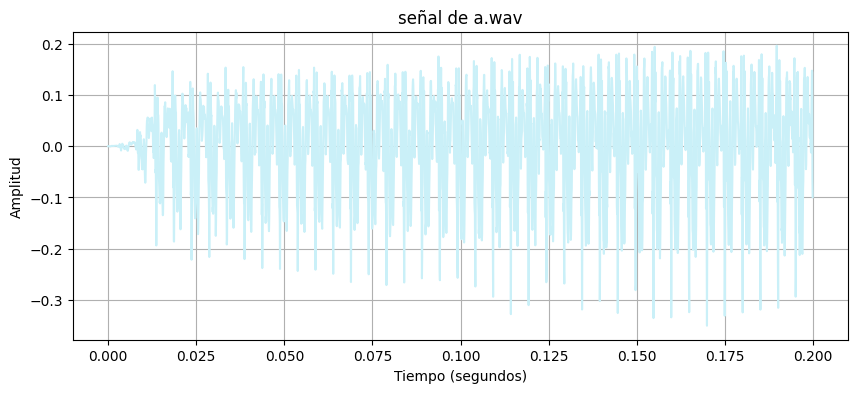

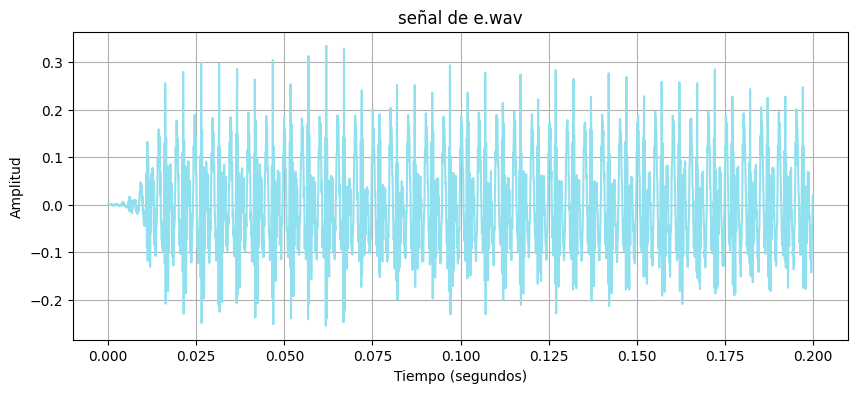

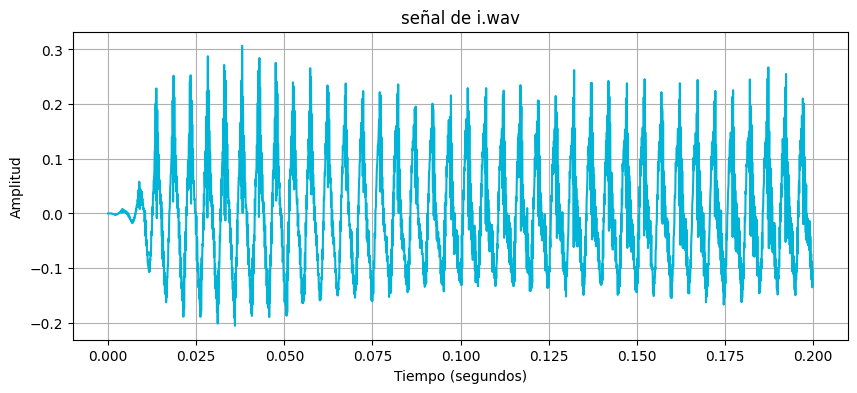

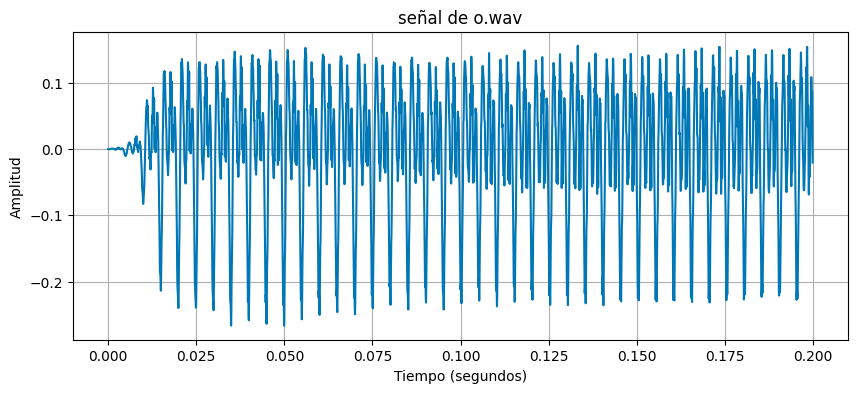

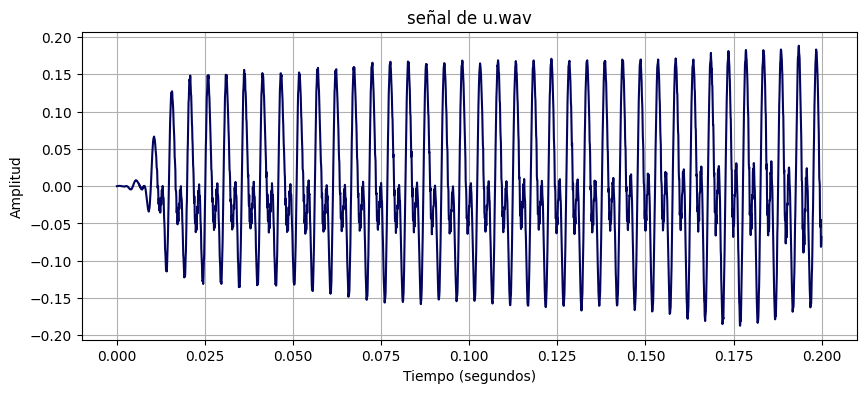

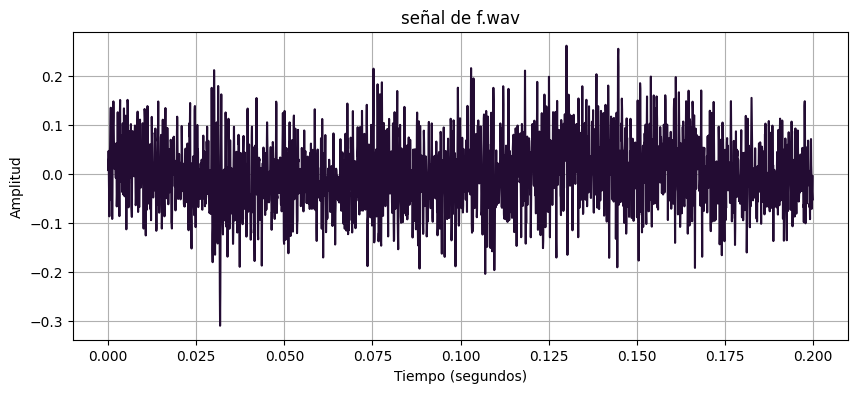

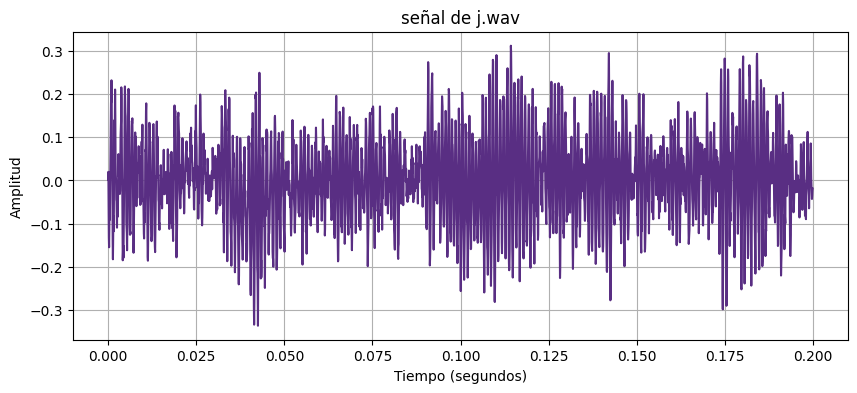

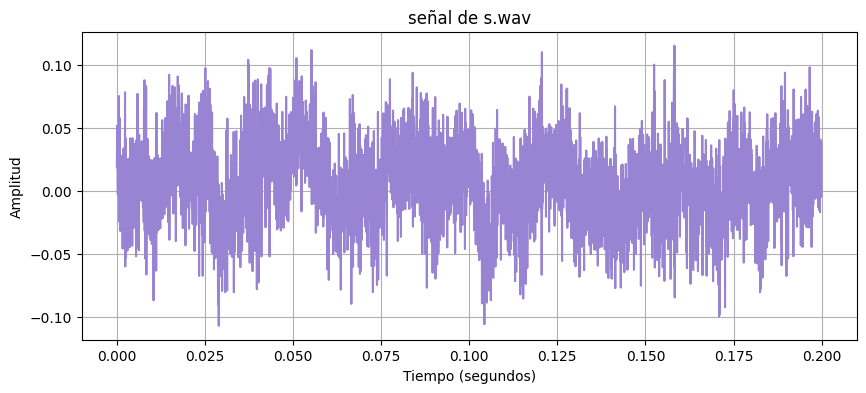

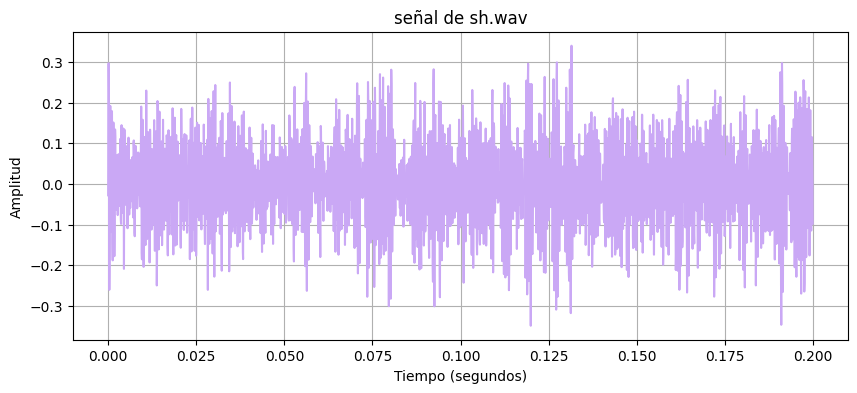

In [8]:
def graficar_señal(audio_recortado, color, nombre):
    tiempo = np.arange(0, N) / frec

    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, audio_recortado, color=color)
    plt.title(f"señal de {nombre}")
    plt.xlabel('Tiempo (segundos)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

colores1 = colores1[::-1]
for i, vocal in enumerate(vocales):
    graficar_señal(recortados[i], colores1[i], vocal)

colores3 = colores3[::-1]
for i, consonante in enumerate(consonantes):
    graficar_señal(recortados[i + len(vocales)], colores3[i], consonante)


    
    

In [9]:
from scipy import signal
autocorrelaciones = []
lags_var = []

def calcular_autocorrelacion(audio_recortado):
    n = len(audio_recortado)

    autocorr = signal.correlate(audio_recortado, audio_recortado, mode='full')


    autocorrelaciones.append(autocorr)
    lags = np.arange(-len(audio_recortado)+1, len(audio_recortado))
    lags_var.append(lags)

for audio_recortado in recortados:
    calcular_autocorrelacion(audio_recortado)



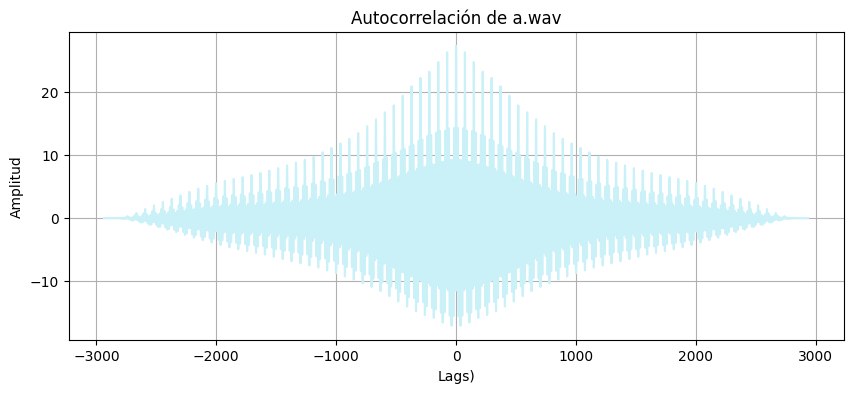

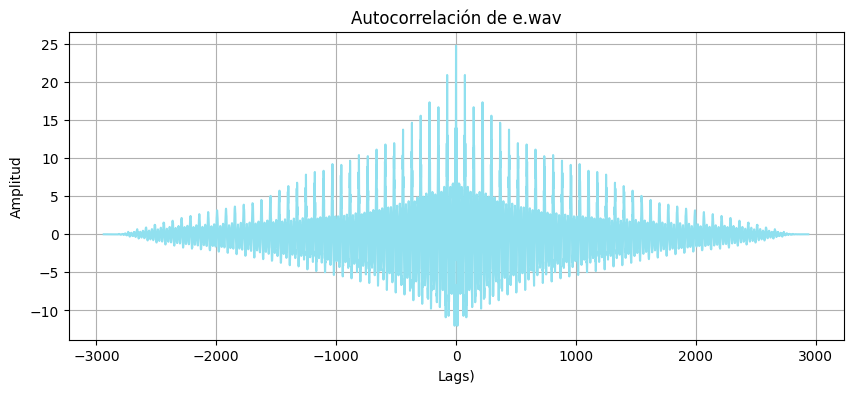

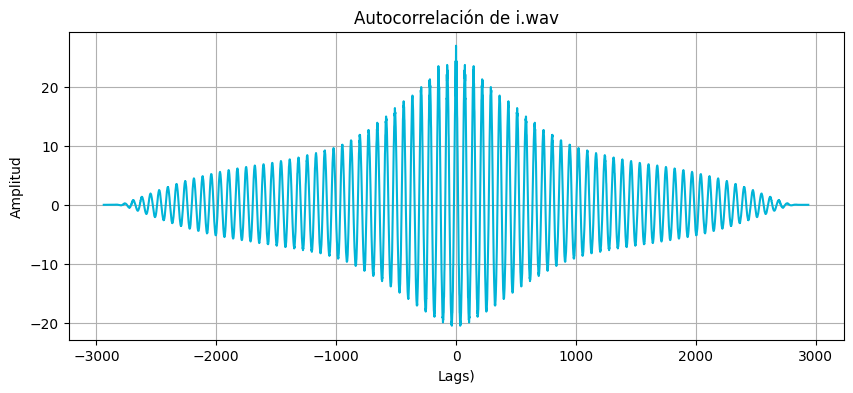

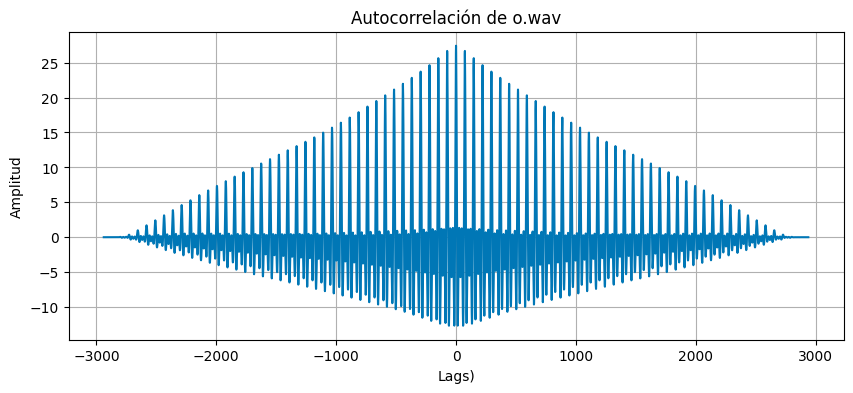

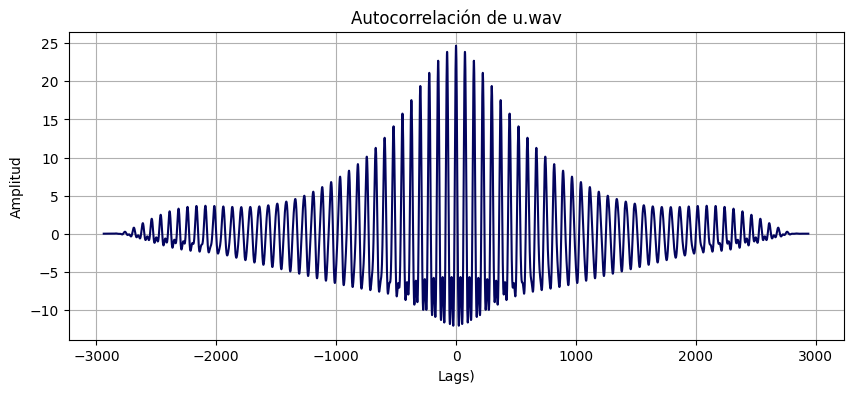

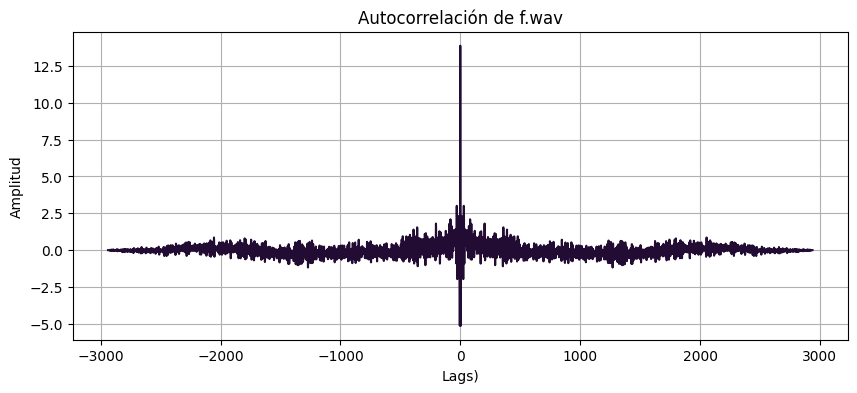

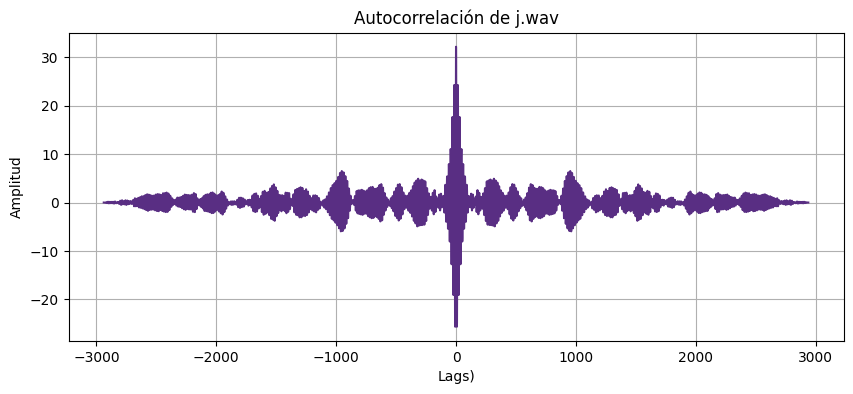

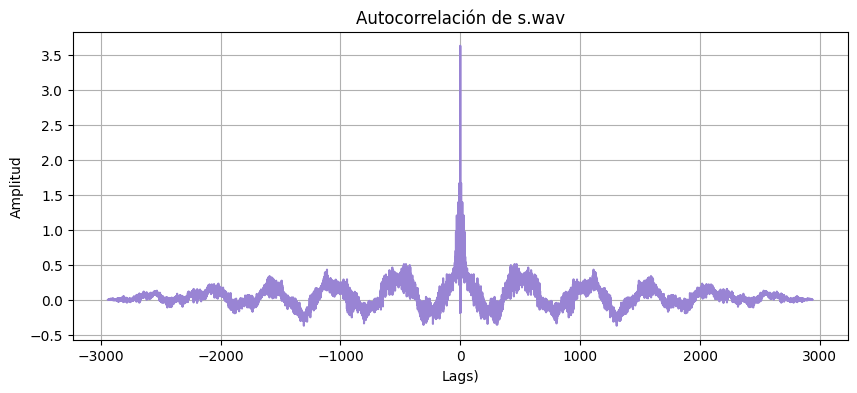

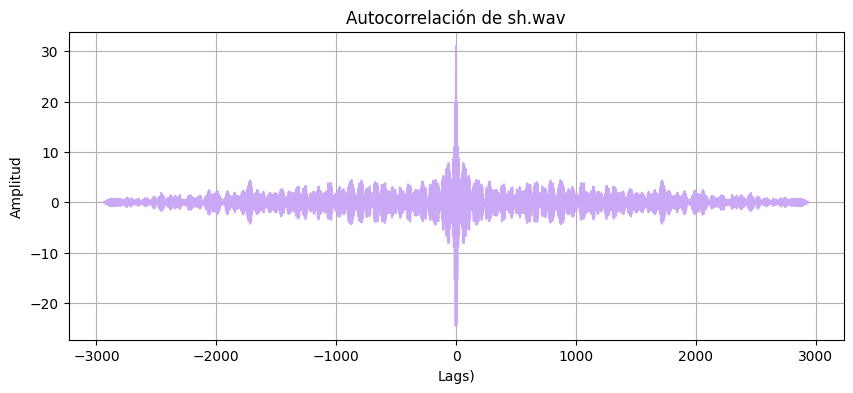

In [10]:
def graficar_autocorrelacion(autocorr, color, nombre, lags):

    plt.figure(figsize=(10, 4))
    plt.plot(lags, autocorr, color=color)
    plt.title(f"Autocorrelación de {nombre}")
    plt.xlabel('Lags)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

for i, vocal in enumerate(vocales):
    graficar_autocorrelacion(autocorrelaciones[i], colores1[i], vocal, lags_var[i])
for i, consonante in enumerate(consonantes):
    graficar_autocorrelacion(autocorrelaciones[i + len(vocales)], colores3[i], consonante, lags_var[i + len(vocales)])

# B

In [ ]:
periodograma = []
frecuencias = []
def calcular_periodograma(audio):
    ft = np.fft.fft(audio)
    psd = np.abs(ft) ** 2 / len(audio)

    mitad = len(audio) // 2 + 1
    psd_unilateral = psd[:mitad]
    frec = np.fft.fftfreq(len(audio), 1 / 14700)[:mitad]
    periodograma.append(psd_unilateral)
    frecuencias.append(frec)







In [ ]:
#impulsos
f0 = 500
psds = []

for i in audios[:len(vocales)+1]:
    mitad = len(i) // 2 + 1
    S, f = psd_pulsos(f0,len(i), 14700)
    psds.append(S[:mitad])

for i in audios[len(vocales)+1:]:
    S, f = psd_pulsos(1,len(i), 14700)
    psds.append(S[:mitad])



def graficar_periodograma_vs_psd(per, color, nombre, frec, psd):
    plt.figure(figsize=(10, 4))
    plt.plot(frec, psd, color="b", label="PSD")
    plt.plot(frec, per, color="r", label="Periodograma")
    plt.title(f"Periodograma de {nombre}")
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('PSD')
    plt.grid(True)
    plt.show()

# for i, audio in enumerate(audios):
#     calcular_periodograma(audio)
#     if i < len(vocales):
#         graficar_periodograma_vs_psd(periodograma[i], colores1[i], vocales[i], frecuencias[i], psds[i])
#     else:
#         graficar_periodograma_vs_psd(periodograma[i], colores3[i - len(vocales)], consonantes[i - len(vocales)], frecuencias[i], psds[i])

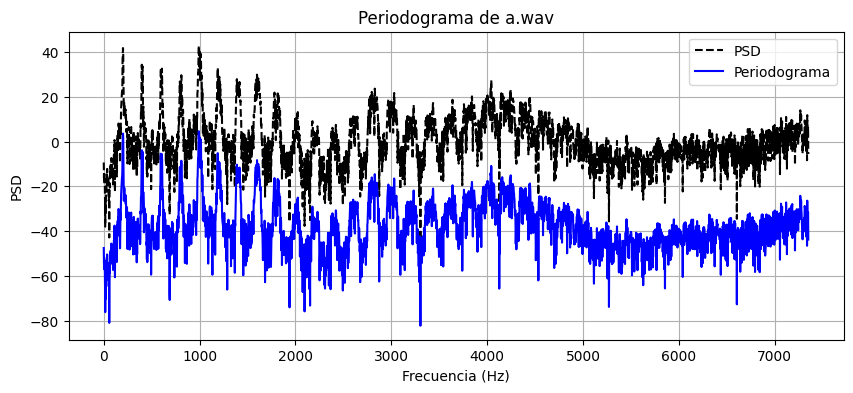

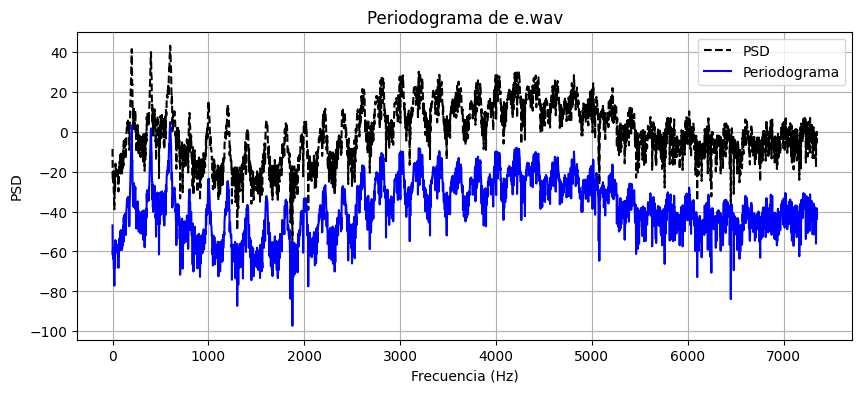

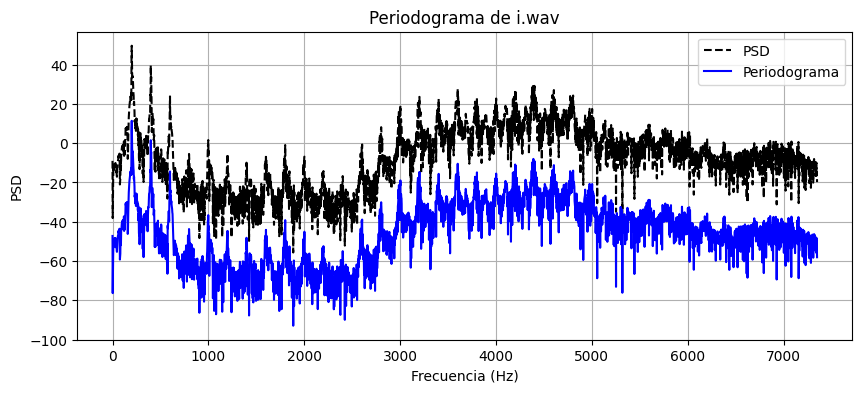

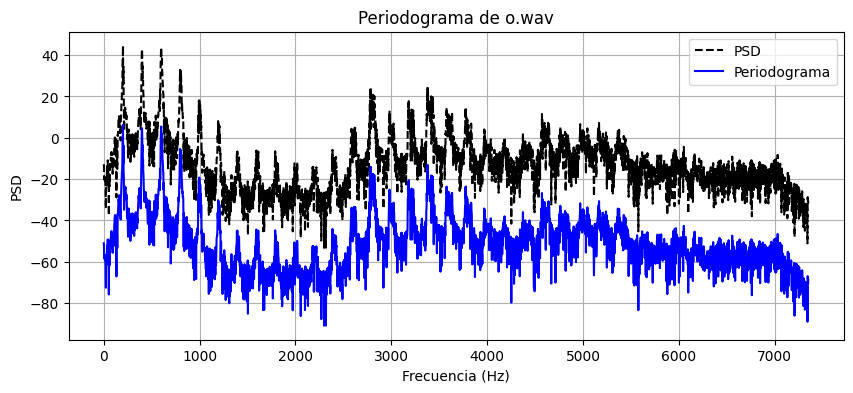

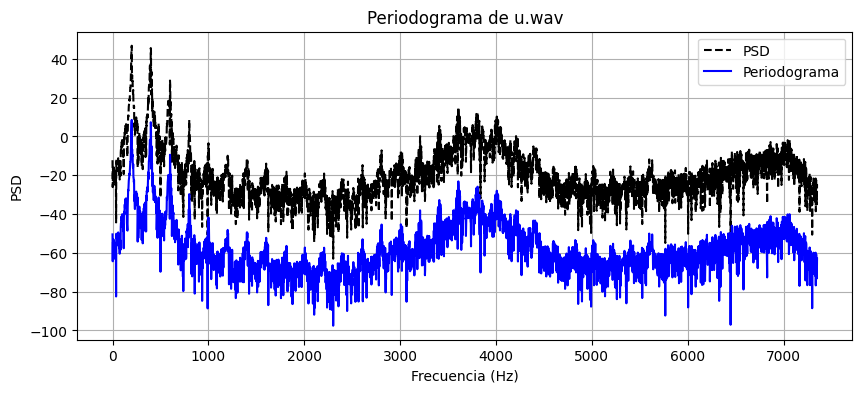

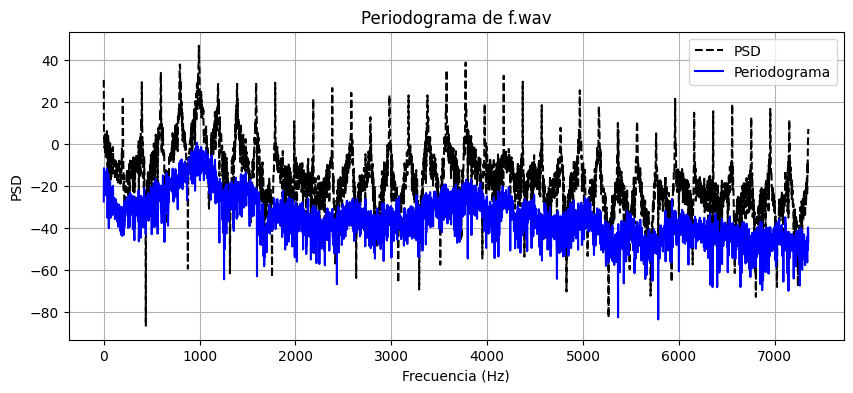

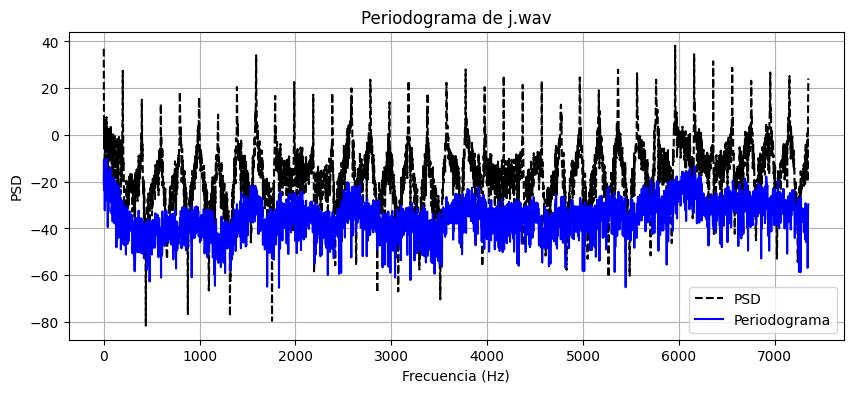

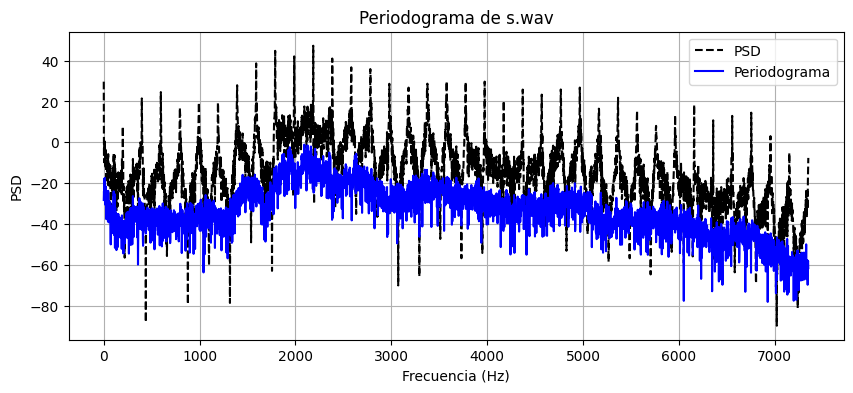

In [33]:
import numpy as np
from scipy.signal import freqz
import matplotlib.pyplot as plt




f0 = 200

def calcular_periodograma(audio):

    ft = np.fft.fft(audio)
    psd = np.abs(ft) ** 2 / len(audio)
    
    # Solo la mitad positiva
    mitad = len(audio) // 2 + 1
    psd_unilateral = psd[:mitad]
    

    frec = np.fft.fftfreq(len(audio), 1 / 14700)[:mitad]
    

    psd_db = 10 * np.log10(psd_unilateral + 1e-10)  
    
    return psd_db, frec



def calcular_psd_teorica(audio, Su, fs=14700):

    h = np.fft.fft(audio)
    mitad = len(audio) // 2 + 1
    h_unilateral = h[:mitad]

    psd_teorica = np.abs(h_unilateral)**2 * Su



    psd_teorica_db = 10 * np.log10(psd_teorica + 1e-10)


    return psd_teorica_db


def graficar_periodograma_vs_psd(per, nombre, frec, psd):
    plt.figure(figsize=(10, 4))
    plt.plot(frec, psd, color="black", label="PSD", linestyle='--')
    plt.plot(frec, per, color="b", label="Periodograma")
    plt.title(f"Periodograma de {nombre}")
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('PSD')
    plt.grid(True)
    plt.legend()
    plt.show()


for i, audio in enumerate(audios[:len(vocales)]):
    Su = 1
    per, f = calcular_periodograma(audio)
    psd = calcular_psd_teorica(audio, Su)
    graficar_periodograma_vs_psd(per, vocales[i], f, psd)

for i, audio in enumerate(audios[len(vocales)+ 1:]):
    mitad = len(audio) // 2 + 1
    Su, f = psd_pulsos(f0, len(audio), 14700)
    per, f = calcular_periodograma(audio)
    psd = calcular_psd_teorica(audio, Su[:mitad])
    graficar_periodograma_vs_psd(per, consonantes[i], f, psd)


    

